In [1]:
import os
import torch
import random
import matplotlib.pyplot as plt

import sys
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)
    
from preprocessing.dataset import SignLanguageDataset

In [2]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())  # Whether to support GPU

2.2.2
False


In [3]:
# Automatically generate category name -> index mapping
frame_root = "../data/frames/train"
class_names = sorted(os.listdir(frame_root))
label_map = {cls: i for i, cls in enumerate(class_names)}
print("Category quantity:", len(label_map))
print("Sample mapping:", list(label_map.items())[:5])

Category quantity: 300
Sample mapping: [('about', 0), ('accident', 1), ('africa', 2), ('again', 3), ('all', 4)]


In [4]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

train_transform = A.Compose([
    A.Resize(224, 224),
    # A.RandomCrop(224, 224, scale=(0.8, 1.0), ratio=(0.9, 1.1), p=0.5),  # Random Cropping
    A.ColorJitter(brightness=0.02, contrast=0.02, saturation=0.01, hue=0.05, p=0.01), # Jitter

 
    #A.OneOf([
        #A.GaussianBlur(blur_limit=3, p=0.3),
        #A.MedianBlur(blur_limit=3, p=0.3),
        #A.MotionBlur(blur_limit=3, p=0.3),
    #], p=0.3), # Nuclear Filter
    
    #A.CoarseDropout(max_holes=2, max_height=20, max_width=20, fill_value=0, p=0.5),
    
    A.Normalize(),
    ToTensorV2()
])

In [5]:
dataset = SignLanguageDataset(
    root_dir=frame_root,
    label_map=label_map,
    transform=train_transform,
    num_frames=20,
    split="train"
)

print("Total number of samples:", len(dataset))


[DEBUG] First 20 samples loaded:
Sample 0: class=write, label=292
    Frame count: 20 | First frame: ../data/frames/train/write/66815/frame_000.jpg
Sample 1: class=write, label=292
    Frame count: 20 | First frame: ../data/frames/train/write/70261/frame_000.jpg
Sample 2: class=write, label=292
    Frame count: 20 | First frame: ../data/frames/train/write/64065/frame_000.jpg
Sample 3: class=write, label=292
    Frame count: 20 | First frame: ../data/frames/train/write/64067/frame_000.jpg
Sample 4: class=write, label=292
    Frame count: 20 | First frame: ../data/frames/train/write/64058/frame_000.jpg
Sample 5: class=write, label=292
    Frame count: 20 | First frame: ../data/frames/train/write/64060/frame_000.jpg
Sample 6: class=write, label=292
    Frame count: 20 | First frame: ../data/frames/train/write/64056/frame_000.jpg
Sample 7: class=write, label=292
    Frame count: 20 | First frame: ../data/frames/train/write/64057/frame_000.jpg
Sample 8: class=write, label=292
    Frame cou

Number of video frames:20, Category index:286


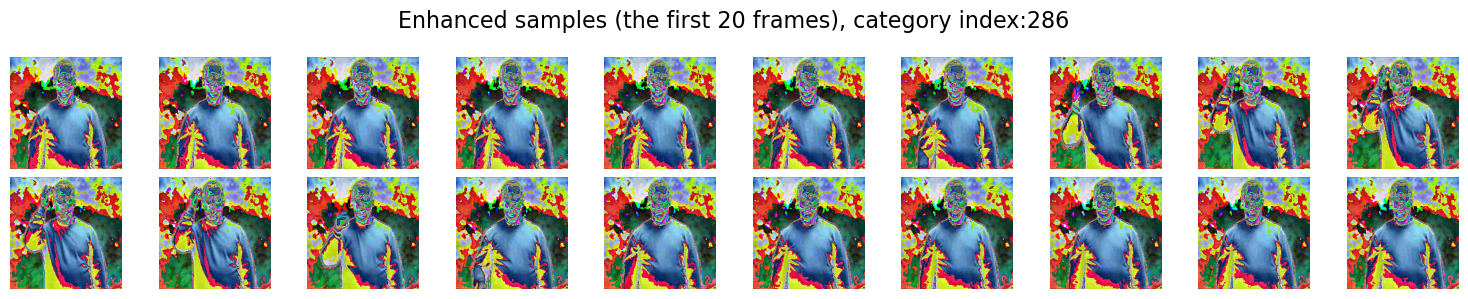

In [6]:
video_tensor, label = random.choice(dataset)

print(f"Number of video frames:{video_tensor.shape[0]}, Category index:{label}")

plt.figure(figsize=(15, 3))
for i in range(20):
    img = video_tensor[i].permute(1, 2, 0).cpu().numpy()  # [C, H, W] → [H, W, C]
    plt.subplot(2, 10, i + 1)
    plt.imshow((img * 255).astype("uint8"))
    plt.axis("off")
plt.suptitle(f"Enhanced samples (the first 20 frames), category index:{label}", fontsize=16)
plt.tight_layout()
plt.show()